# Introduction

The SIR model is a common model for predicting the spread of infectious diseases.  SIR(S=Susceptible, I=Infectious, R=Recovered) models use first-order differential equations to model the number of people in three categories: susceptible, infected, and recovered.  It can be used to predict duration and severity of epidemics with reasonable efficacy.  In this notebook, a very simple SIR model will be applied to the ongoing COVID_19 pandemic, fitting the curve to the 7-day average for new infections in the state of Michigan.  

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd

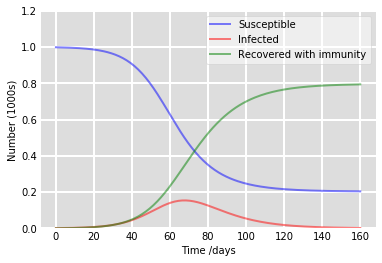

In [2]:
# Total population, N.
N = 1000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.2, 1./10 
# A grid of time points (in days)
t = np.linspace(0, 160, 160)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [3]:
MichiganData=pd.read_csv(r'C:\Users\Adam Baker\Downloads\case_daily_trends__michigan.csv')
MichiganData=MichiganData.sort_index(axis=0, ascending=False)
MichiganData.head()

,Date,New Cases,7-Day Moving Avg
313,Jan 22 2020,0,0
312,Jan 23 2020,0,0
311,Jan 24 2020,0,0
310,Jan 25 2020,0,0
309,Jan 26 2020,0,0


<BarContainer object of 314 artists>

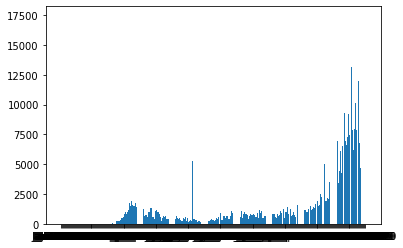

In [4]:
plt.bar(data=MichiganData,x='Date',height="New Cases")

As is visible, this data is noisy and not clean.  This is included to demonstrate why the 7-Day moving average is used.  

<BarContainer object of 314 artists>

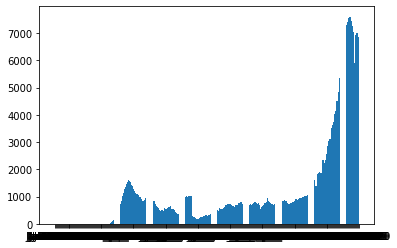

In [5]:
plt.bar(data=MichiganData,x='Date',height="7-Day Moving Avg")

This column is much easier to read and conducive to fit a curve to.  This is why the 7-Day Moving Average is used for this model. The following cell includes the Michigan Data.  I found the optimum fit when the infection rate beta is equal to 0.1163 and gamma equals 1/14.  This means that the duration of sickness is 14 days and every infectious person infects a new person about 8.6 days.  

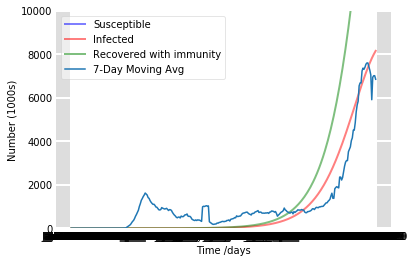

In [6]:
# Total population, N.
N = 10000000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 2, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.1163, 1./14 
# A grid of time points (in days)
t = np.linspace(0, 313, 313)


# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/100, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/100, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/100, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.plot('Date','7-Day Moving Avg',data=MichiganData)
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,10000)
#ax.set_facecolor('none')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

And finally, we extend the model to the end of the projected pandemic.  

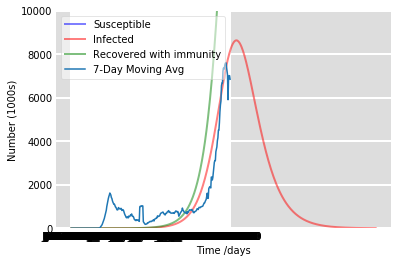

In [7]:
# Total population, N.
N = 10000000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 2, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.1163, 1./14 
# A grid of time points (in days)
t = np.linspace(0, 600, 600)


# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/100, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/100, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/100, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.plot('Date','7-Day Moving Avg',data=MichiganData)
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,10000)
#ax.set_facecolor('none')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

# Conclusion 

This simple model does not take into account the first wave in the spring or the steady state of infections in the summer.  It does do a good job of matching the surge in Michigan in the fall and winter, and suggests that the pandemic will peak a little over 300 days into the pandemic in December and soonafter plummet.  If course, it does not take into account the development of vaccines and their likely implementation in December 2020 and early 2021.  However, it does suggest that a fall in new cases in December/January may be in part because of the natural end of the pandemic.  